# Importing required common libraries

In [182]:
## handling csv file and data
import numpy as np
import pandas as pd

## Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Labelencoding function
from sklearn.preprocessing import LabelEncoder

## Scaling function
from sklearn.preprocessing import MinMaxScaler

## SMOTE function(for oversampling of minor classes)
from imblearn.over_sampling import SMOTE

## Train-test split function and hyper parameter tuning function
from sklearn.model_selection import train_test_split,GridSearchCV

## Evaluation metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

## For ignoring warnings(may not be necessary)
import warnings
warnings.filterwarnings('ignore')

In [183]:
## Required models from their respective libraries
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, MultinomialNB, BernoulliNB

# Importing dataset and exploring it

In [184]:
## importing dataset
pred_or_sev = "pred"
dataset = pd.read_csv("heart-95.csv")
dataset.shape

(918, 12)

In [185]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


No of instances of each target class:
 1    508
0    410
Name: target, dtype: int64 

Plot of the above one:


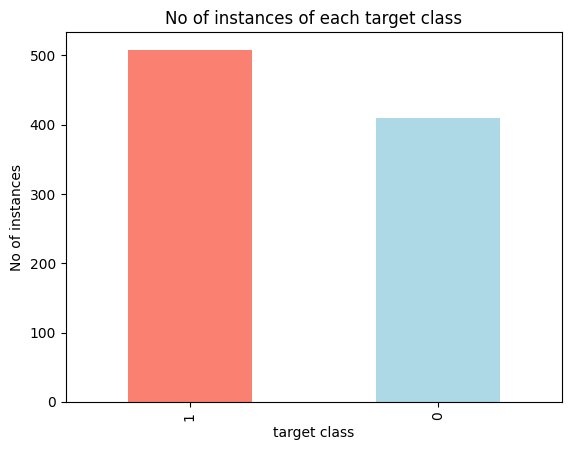

In [186]:
print("No of instances of each target class:\n",dataset["target"].value_counts(),"\n")
print("Plot of the above one:")
dataset["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])
plt.xlabel("target class")
plt.ylabel("No of instances")
plt.title("No of instances of each target class")
plt.show()

This dataset does not contain any null values but it contain some categorial values which should be converted into numerical values

In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [188]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In the covariance matrix below we are not getting some columns because they do not contain numerical values

In [189]:
#Make a correlation matrix
dataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
target,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


(7.5, -0.5)

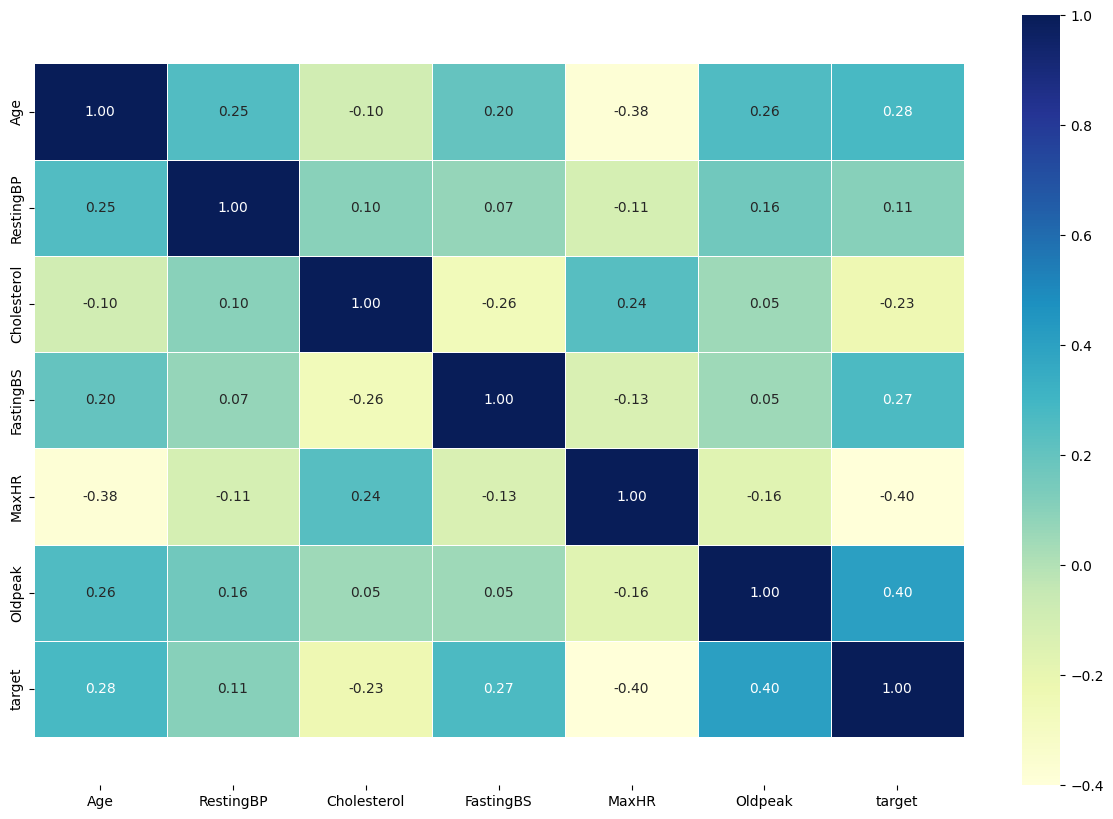

In [190]:
#Visualise correlation
corr_matrix = dataset.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

# Data preprocessing

In [191]:
categorical_columns =['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in categorical_columns:
  lbl=LabelEncoder()
  dataset[i] = lbl.fit_transform(dataset[i])

In [192]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
scaler = MinMaxScaler()
oversample = SMOTE()
predictors,target = oversample.fit_resample(predictors, target)

In [193]:
predictors_2,target_2 = oversample.fit_resample(predictors, target)
predictors_2 = scaler.fit_transform(predictors_2)
X_train, X_test,Y_train,Y_test = train_test_split(predictors_2,target_2,test_size=0.20,random_state=0)

In [194]:
models = [
  GaussianNB(),
  CategoricalNB(),
  ComplementNB(),
  MultinomialNB(),
  BernoulliNB()
]

model_names = [
    "Multinomial Naive Bayes",
    "Categorical Naive Bayes",
    "Complement Naive Bayes",
    "Gaussian Naive Bayes",
    "Bernoulli Naive Bayes"
]

Model: Multinomial Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 86.76 %
   b)The precision score achieved using Naive Bayes is: 85.59 %
   c)The recall score achieved using Naive Bayes is: 89.62 %
   d)The f1 score achieved using Naive Bayes is: 87.56 %

                                                            
Confusion matrix


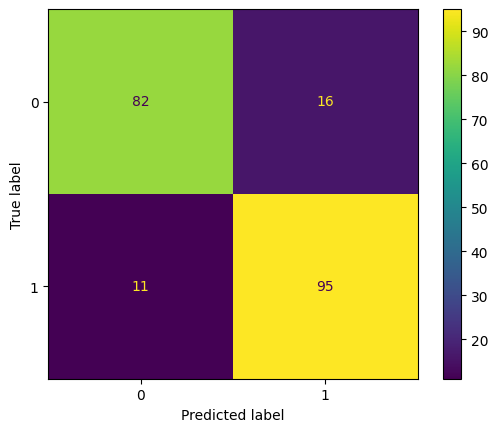

                                                            
Model: Categorical Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 81.37 %
   b)The precision score achieved using Naive Bayes is: 81.48 %
   c)The recall score achieved using Naive Bayes is: 83.02 %
   d)The f1 score achieved using Naive Bayes is: 82.24 %

                                                            
Confusion matrix


<Figure size 640x480 with 0 Axes>

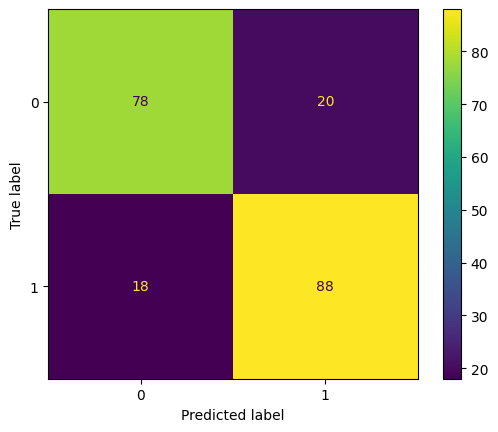

                                                            
Model: Complement Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 83.82 %
   b)The precision score achieved using Naive Bayes is: 87.63 %
   c)The recall score achieved using Naive Bayes is: 80.19 %
   d)The f1 score achieved using Naive Bayes is: 83.74 %

                                                            
Confusion matrix


<Figure size 640x480 with 0 Axes>

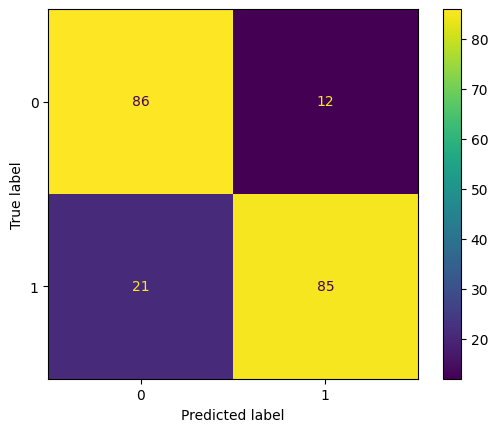

                                                            
Model: Gaussian Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 83.82 %
   b)The precision score achieved using Naive Bayes is: 87.63 %
   c)The recall score achieved using Naive Bayes is: 80.19 %
   d)The f1 score achieved using Naive Bayes is: 83.74 %

                                                            
Confusion matrix


<Figure size 640x480 with 0 Axes>

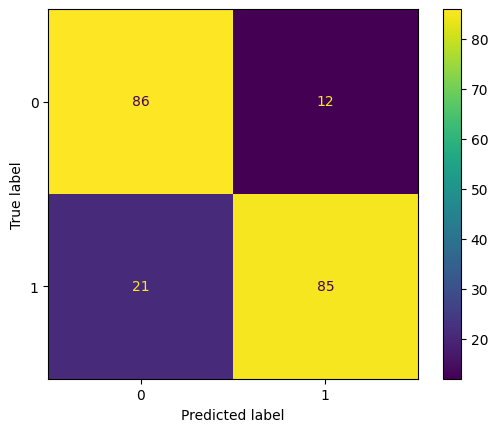

                                                            
Model: Bernoulli Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 78.92 %
   b)The precision score achieved using Naive Bayes is: 77.88 %
   c)The recall score achieved using Naive Bayes is: 83.02 %
   d)The f1 score achieved using Naive Bayes is: 80.37 %

                                                            
Confusion matrix


<Figure size 640x480 with 0 Axes>

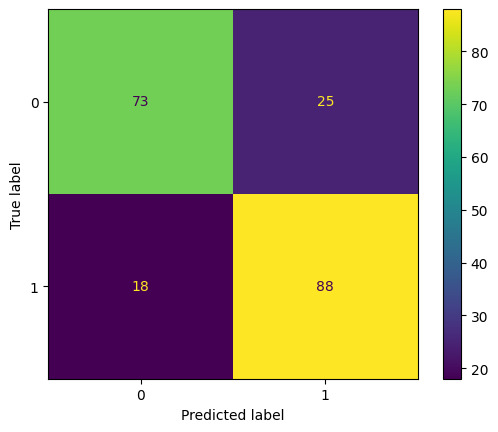

<Figure size 640x480 with 0 Axes>

In [195]:
for model,model_name in zip(models, model_names):
  print("=="*30)
  print("Model:",model_name)
  print("  "*30)

  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  Y_test = np.array(Y_test)

  accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
  print("   a)The accuracy score achieved using Naive Bayes is: "+str(accuracy)+" %")

  precision = round(precision_score(Y_test,Y_pred)*100,2)
  print("   b)The precision score achieved using Naive Bayes is: "+str(precision)+" %")

  recall= round(recall_score(Y_test,Y_pred)*100,2)
  print("   c)The recall score achieved using Naive Bayes is: "+str(recall)+" %")

  f1 = round(f1_score(Y_test,Y_pred)*100,2)
  print("   d)The f1 score achieved using Naive Bayes is: "+str(f1)+" %")
  print()

  print("  "*30)
  labels = [0,1]
  if pred_or_sev == "sev":
      labels = [0,1,2,3,4]

  print("Confusion matrix")

  c = confusion_matrix(Y_test, Y_pred)

  cm_display = ConfusionMatrixDisplay(confusion_matrix = c, display_labels = labels)

  cm_display.plot()
  plt.show()
  plt.savefig("Confusion_matrix_"+ str(model_name)+".png")
  print("  "*30)